In [1]:
# let's import pandas library and set options to be able to view data right in the browser
# Assign pd for a short alias for pandas library
import pandas as pd
# Call set_option function fron pandas library to edit them limit for number of the displayed
# columns, width of all columns and maximum width of one column
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [2]:
###Let's import additional libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_table(r'C:\Users\asd\Desktop\user_sessions_export.tsv')

In [4]:
df.shape

(78436, 37)

In [5]:
#And look into it's structure
df.head()

,card_view_type,room_rooms_offered,site_id,offer_category,garage_type,query_text,anonymized_user_id,total_results,rgid,house_type,primary_sale,client_type,apartment_rooms_total,rent_price,parking_type,apartment_total_area,rereferer,event_type,timestamp,apartment_flat_type,query_id,offer_type,commercial_type_list,fastlink,title,subject_federation_id,pricing_period,web_referer,offer_id,developer_id_list,event_place,revoked,apartment_floor,village_id,page_number,sell_price,room_rooms_total
0,USED,1.0,NaN,ROOMS,NaN,50759f78c459038f9772ba023b9f711f,ac395e970bd92e6dac60576914f40431,0,417899.0,NaN,NaN,TOUCH_PAD,NaN,13500.0,NaN,NaN,https://realty.yandex.ru/sankt-peterburg/snyat/komnata/?subLocality=417975&page=1,CARD_SHOW,1598358743000000,NaN,50759f78c459038f9772ba023b9f711f,RENT,NaN,False,NaN,10174.0,PRICING_PERIOD_UNKNOWN,https://realty.yandex.ru/offer/6053180953082735872/?isExact=YES,6.053181e+18,NaN,CARD_TOP,False,NaN,NaN,0,NaN,5.0
1,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,93684c83d8f27359373157f92e33ce8c,12205865945ca3f9545080d9b268b98f,38,NaN,NaN,NaN,TOUCH_PHONE,NaN,NaN,NaN,NaN,https://m.realty.yandex.ru/sankt-peterburg/kupit/novostrojka/novaya-ohta-2145/?from=yandex_wizard_maps&roomsTotal=2,SEARCH_SHOW,1598382056000000,NaN,93684c83d8f27359373157f92e33ce8c,OFFER_TYPE_UNKNOWN,NaN,True,1 комната,NaN,NaN,https://m.realty.yandex.ru/sankt-peterburg/kupit/kvartira/dvuhkomnatnaya/?siteId=2145&primarySale=NO,NaN,NaN,UNKNOWN,False,NaN,NaN,0,NaN,NaN
2,USED,1.0,NaN,ROOMS,NaN,d3be00de046fdbdd2a2b5d64dc7d01b7,9bd0f7b1c5d39ed35e0f3dbfabda91f1,0,417899.0,NaN,NaN,DESKTOP,NaN,15000.0,NaN,NaN,https://realty.yandex.ru/sankt-peterburg/snyat/komnata/karta/?utm_source=main_stripe_big&leftLongitude=30.240695&topLatitude=59.946513&rightLongitude=30.303008&bottomLatitude=59.934068&zoom=15&activePoint=59.935013%2C30.270548,CARD_SHOW,1598303939000000,NaN,d3be00de046fdbdd2a2b5d64dc7d01b7,RENT,NaN,False,NaN,10174.0,PRICING_PERIOD_UNKNOWN,https://realty.yandex.ru/offer/2873837982416659969/?isExact=YES,2.873838e+18,NaN,CARD_TOP,False,NaN,NaN,0,NaN,3.0
3,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,0a128a65f5a0b46c63b775c7cb8ed143,f9e6354e22bedcc4cc77c5ff0cf78de6,1828,417899.0,NaN,NaN,TOUCH_PHONE,NaN,NaN,NaN,NaN,https://m.realty.yandex.ru/sankt-peterburg/snyat/kvartira/dvuhkomnatnaya/?cardIndex=19&isExact=YES&page=4&sort=PRICE,SEARCH_SHOW,1598352595000000,NaN,0a128a65f5a0b46c63b775c7cb8ed143,OFFER_TYPE_UNKNOWN,NaN,False,NaN,0.0,NaN,https://m.realty.yandex.ru/sankt-peterburg/snyat/kvartira/dvuhkomnatnaya/?cardIndex=19&isExact=YES&page=5&sort=PRICE,NaN,NaN,LISTING,False,NaN,NaN,5,NaN,NaN
4,USED,NaN,NaN,APARTMENT,NaN,2e20edcf02c3a12be6bed4c0b47033a9,114e45ee149da8be73ae5b051c9292c3,0,417899.0,NaN,False,DESKTOP,2.0,NaN,NaN,44.5,https://realty.yandex.ru/sankt-peterburg/kupit/kvartira/dvuhkomnatnaya/?subLocality=417979&metroGeoId=20319&priceMax=4650000&metroTransport=ON_FOOT&timeToMetro=20,CARD_SHOW,1598364660000000,FLAT_TYPE_SECONDARY,2e20edcf02c3a12be6bed4c0b47033a9,SELL,NaN,False,NaN,10174.0,NaN,https://realty.yandex.ru/offer/5439578279210637569/?isExact=NO,5.439578e+18,NaN,CARD_TOP,False,0.0,NaN,0,4680000.0,NaN


In [6]:
df.columns

Index(['card_view_type', 'room_rooms_offered', 'site_id', 'offer_category', 'garage_type', 'query_text', 'anonymized_user_id', 'total_results', 'rgid', 'house_type', 'primary_sale', 'client_type', 'apartment_rooms_total', 'rent_price', 'parking_type', 'apartment_total_area', 'rereferer', 'event_type', 'timestamp', 'apartment_flat_type', 'query_id', 'offer_type', 'commercial_type_list', 'fastlink', 'title', 'subject_federation_id', 'pricing_period', 'web_referer', 'offer_id', 'developer_id_list', 'event_place', 'revoked', 'apartment_floor', 'village_id', 'page_number', 'sell_price', 'room_rooms_total'], dtype='object')

In [7]:
#Let's clean dirty data from logs or useless features
df.drop(["rereferer", "fastlink","title","subject_federation_id","developer_id_list","revoked"], axis = 1, inplace = True)

## Let's explore random user sessions and save then to the excel file 
We know that 1 query_id = 1 session. Let's group all records by query_id

In [8]:
sessions = df['query_id'].sample(n=5, random_state=17).to_list()

In [9]:
print(sessions)

['3201e464f1d3705e90cba80964754cb0', '29d11b0997cf5cc27ae3c2ec9f7506ea', '6b595a48b068b6607e46fc2b4d441a02', 'b15abb82ede660f5d8362cfd5264a2d9', 'b3283ac342c500dd36d9842eb4e21d11']


In [10]:
df[df['query_id']==sessions[0]]

,card_view_type,room_rooms_offered,site_id,offer_category,garage_type,query_text,anonymized_user_id,total_results,rgid,house_type,primary_sale,client_type,apartment_rooms_total,rent_price,parking_type,apartment_total_area,event_type,timestamp,apartment_flat_type,query_id,offer_type,commercial_type_list,pricing_period,web_referer,offer_id,event_place,apartment_floor,village_id,page_number,sell_price,room_rooms_total
16541,USED,NaN,46511.0,APARTMENT,NaN,3201e464f1d3705e90cba80964754cb0,7aa6c4a2dd7e7005ee2ec9a4f0f76a76,0,417899.0,NaN,NaN,DESKTOP,0.0,14000.0,NaN,26.299999,CARD_SHOW,1598362859000000,FLAT_TYPE_UNKNOWN,3201e464f1d3705e90cba80964754cb0,RENT,NaN,PRICING_PERIOD_UNKNOWN,https://realty.yandex.ru/offer/9072354612033504000/?isExact=YES,9.072355e+18,CARD_TOP,0.0,NaN,0,NaN,NaN
20970,USED,NaN,295910.0,APARTMENT,NaN,3201e464f1d3705e90cba80964754cb0,7aa6c4a2dd7e7005ee2ec9a4f0f76a76,0,417899.0,NaN,NaN,DESKTOP,0.0,15000.0,NaN,30.000000,CARD_SHOW,1598363163000000,FLAT_TYPE_UNKNOWN,3201e464f1d3705e90cba80964754cb0,RENT,NaN,PRICING_PERIOD_UNKNOWN,https://realty.yandex.ru/offer/7118414636760521984/?isExact=YES,7.118415e+18,CARD_TOP,0.0,NaN,0,NaN,NaN
29508,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,3201e464f1d3705e90cba80964754cb0,7aa6c4a2dd7e7005ee2ec9a4f0f76a76,596,417899.0,NaN,NaN,DESKTOP,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598362724000000,NaN,3201e464f1d3705e90cba80964754cb0,OFFER_TYPE_UNKNOWN,NaN,NaN,https://realty.yandex.ru/sankt-peterburg/snyat/kvartira/studiya/?sort=PRICE,NaN,LISTING,NaN,NaN,0,NaN,NaN
33261,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,3201e464f1d3705e90cba80964754cb0,7aa6c4a2dd7e7005ee2ec9a4f0f76a76,596,417899.0,NaN,NaN,DESKTOP,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598362683000000,NaN,3201e464f1d3705e90cba80964754cb0,OFFER_TYPE_UNKNOWN,NaN,NaN,https://realty.yandex.ru/sankt-peterburg/snyat/kvartira/,NaN,LISTING,NaN,NaN,0,NaN,NaN
33572,USED,NaN,NaN,APARTMENT,NaN,3201e464f1d3705e90cba80964754cb0,7aa6c4a2dd7e7005ee2ec9a4f0f76a76,0,417899.0,NaN,NaN,DESKTOP,0.0,13000.0,NaN,20.799999,CARD_SHOW,1598362748000000,FLAT_TYPE_UNKNOWN,3201e464f1d3705e90cba80964754cb0,RENT,NaN,PRICING_PERIOD_UNKNOWN,https://realty.yandex.ru/offer/1084584076936862464/?isExact=YES,1.084584e+18,CARD_TOP,0.0,NaN,0,NaN,NaN
41530,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,3201e464f1d3705e90cba80964754cb0,7aa6c4a2dd7e7005ee2ec9a4f0f76a76,596,417899.0,NaN,NaN,DESKTOP,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598362687000000,NaN,3201e464f1d3705e90cba80964754cb0,OFFER_TYPE_UNKNOWN,NaN,NaN,https://realty.yandex.ru/sankt-peterburg/snyat/kvartira/studiya/,NaN,LISTING,NaN,NaN,0,NaN,NaN
49631,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,3201e464f1d3705e90cba80964754cb0,7aa6c4a2dd7e7005ee2ec9a4f0f76a76,2329,NaN,NaN,NaN,DESKTOP,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598362684000000,NaN,3201e464f1d3705e90cba80964754cb0,OFFER_TYPE_UNKNOWN,NaN,NaN,https://realty.yandex.ru/sankt-peterburg/snyat/kvartira/studiya/,NaN,LISTING,NaN,NaN,0,NaN,NaN
62419,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,3201e464f1d3705e90cba80964754cb0,7aa6c4a2dd7e7005ee2ec9a4f0f76a76,551,NaN,NaN,NaN,DESKTOP,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598362684000000,NaN,3201e464f1d3705e90cba80964754cb0,OFFER_TYPE_UNKNOWN,NaN,NaN,https://realty.yandex.ru/sankt-peterburg/snyat/kvartira/studiya/,NaN,LISTING,NaN,NaN,0,NaN,NaN
74257,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,3201e464f1d3705e90cba80964754cb0,7aa6c4a2dd7e7005ee2ec9a4f0f76a76,559,NaN,NaN,NaN,DESKTOP,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598362684000000,NaN,3201e464f1d3705e90cba80964754cb0,OFFER_TYPE_UNKNOWN,NaN,NaN,https://realty.yandex.ru/sankt-peterburg/snyat/kvartira/studiya/,NaN,LISTING,NaN,NaN,0,NaN,NaN
77019,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,3201e464f1d3705e90cba80964754cb0,7aa6c4a2dd7e7005ee2ec9a4f0f76a76,596,417899.0,NaN,NaN,DESKTOP,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598363023000000,NaN,3201e464f1d3705e90cba80964754cb0,OFFER_TYPE_UNKNOWN,NaN,NaN,https://realty.yandex.ru/sankt-peterburg/snyat/kvartira/studiya/?sort=PRICE&page=1,NaN,LISTING,NaN,NaN,1,NaN,NaN


## Let's save sessions to xls file  

In [11]:
path = r"output.xlsx"
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')

for session in sessions:
    df[df['query_id']==session].to_excel(writer,sheet_name=session[-5:])
    
writer.save()
writer.close()

## Self-control stops
1. Analyze 10 random users behavior (anonymized_user_id field) and share your insights how product management team could improve Yandex.Realty service.
2. Compare 10 random sessions with phone call event and without it and share your insights about the difference between users who convert to phone calls and those who don't.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78436 entries, 0 to 78435
Data columns (total 31 columns):
card_view_type           78436 non-null object
room_rooms_offered       1874 non-null float64
site_id                  10530 non-null float64
offer_category           78436 non-null object
garage_type              35 non-null object
query_text               78436 non-null object
anonymized_user_id       78436 non-null object
total_results            78436 non-null int64
rgid                     67645 non-null float64
house_type               3690 non-null object
primary_sale             19450 non-null object
client_type              78436 non-null object
apartment_rooms_total    23226 non-null float64
rent_price               11464 non-null float64
parking_type             35 non-null object
apartment_total_area     23226 non-null float64
event_type               78436 non-null object
timestamp                78436 non-null int64
apartment_flat_type      23226 non-null object
qu

In [131]:
list_of_category=['card_view_type','room_rooms_offered','offer_category','client_type','event_type','offer_type','event_place','apartment_floor','apartment_rooms_total']
list_of_number=['total_results','rent_price','apartment_total_area']
list_of_drop=['village_id','offer_id','web_referer','timestamp','rgid','anonymized_user_id','query_text','site_id','query_id','pricing_period','page_number']

In [121]:
sample=df['anonymized_user_id'].drop_duplicates().sample(n=10, replace=False,  random_state=12, axis=0).tolist()

In [122]:
sample=df[df['anonymized_user_id'].isin(sample)].drop_duplicates()

In [125]:
sample=sample.drop(list_of_drop,axis=1).dropna(axis = 1,how='all')

In [126]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 811 to 78382
Data columns (total 17 columns):
card_view_type           139 non-null object
room_rooms_offered       11 non-null float64
offer_category           139 non-null object
total_results            139 non-null int64
house_type               1 non-null object
primary_sale             36 non-null object
client_type              139 non-null object
apartment_rooms_total    35 non-null float64
rent_price               11 non-null float64
apartment_total_area     35 non-null float64
event_type               139 non-null object
apartment_flat_type      35 non-null object
offer_type               139 non-null object
event_place              139 non-null object
apartment_floor          35 non-null float64
sell_price               36 non-null float64
room_rooms_total         11 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 19.5+ KB


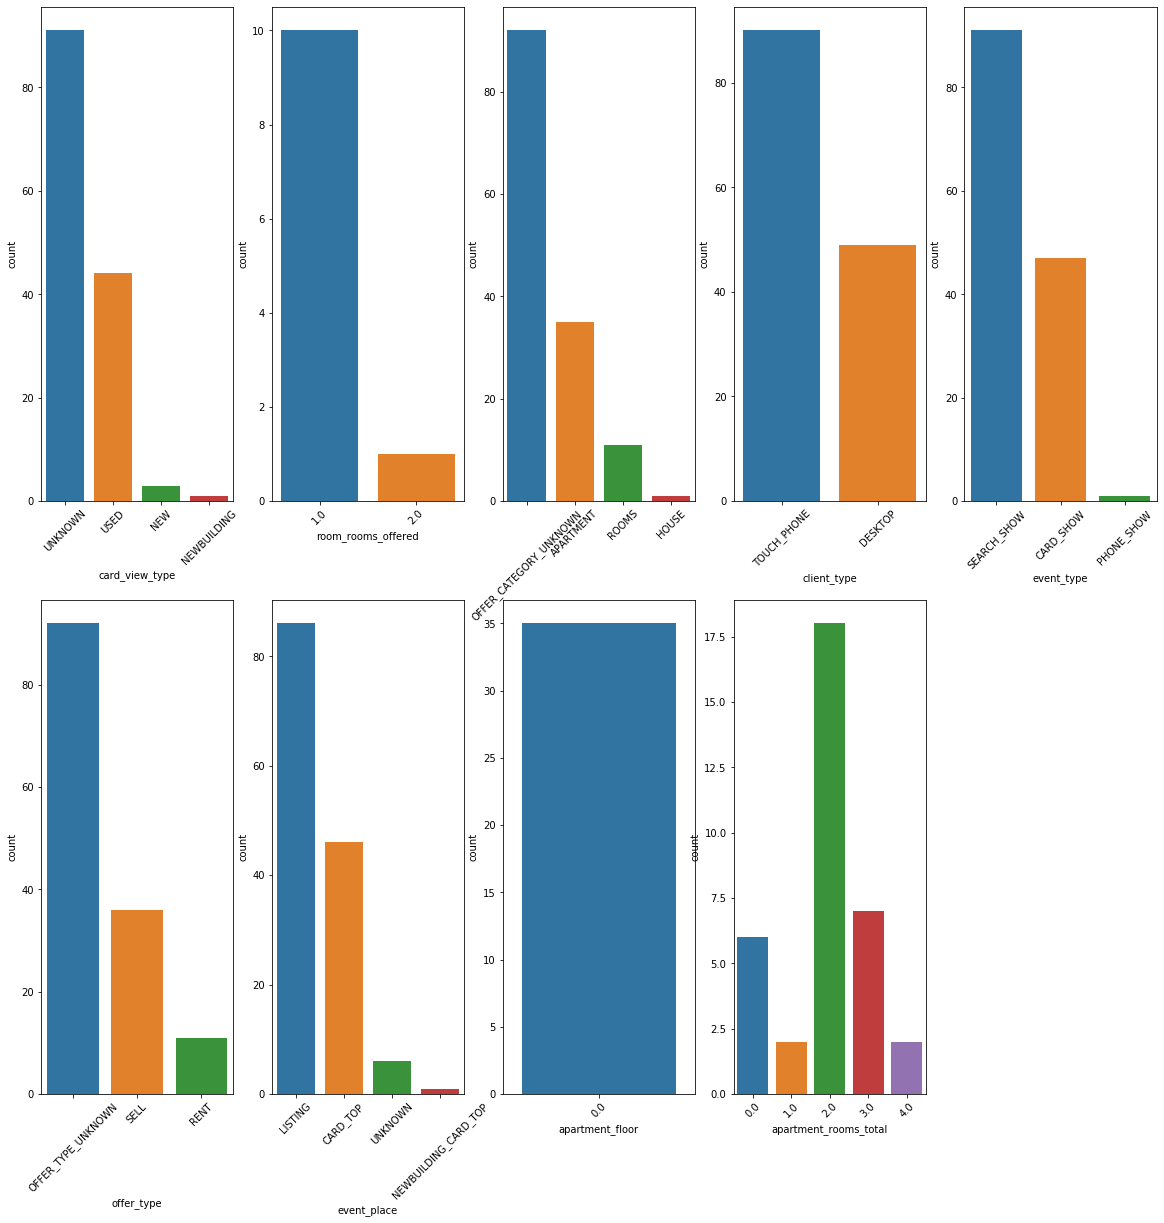

In [133]:
sample_category=sample[list_of_category]


plt.figure(figsize=(20,20))
i=1
for col in sample_category.columns:
    plt.subplot(2,5,i)
    sns.countplot(sample_category[col])
    plt.xticks(rotation=45)
    i=i+1

In [129]:
sample_full=sample[['card_view_type','offer_category','client_type','event_type','offer_type','event_place']]
sample_number=sample[['total_results','']]

In [137]:
len(sample[sample['total_results']==0])/len(sample)

0.34532374100719426

In [139]:
sample['rent_price'].describe()

count       11.000000
mean     11544.090909
std       2170.802637
min       9000.000000
25%      10000.000000
50%      11000.000000
75%      12000.000000
max      16000.000000
Name: rent_price, dtype: float64

In [142]:
sample['sell_price'].describe()

count    3.600000e+01
mean     6.574043e+06
std      3.808923e+06
min      2.990000e+06
25%      3.903000e+06
50%      4.364000e+06
75%      8.275000e+06
max      1.800000e+07
Name: sell_price, dtype: float64

In [143]:
6.574043e+06

6574043.0

### Self-Control Stops
- 1. Analyze 10 random users behavior (anonymized_user_id field) and share your insights how product management team could improve Yandex.Realty service.

On the whole, the 10 random USERS lacked serious information.  34.532% of the query information is 0, although  have a lot of query information, they also lack key information such as house type, rent_price, sell_price, and total rooms. In terms of user distribution, Tourch Phone has more users than Destktop. From the event point of view, most log events are search-show instead of card-show.

In summary, the product manager team should enrich the information and reduce the lack of information(espically apartments with 2-3 rooms,rent price about 11544,sell price about 6574043 ); focus on optimizing web search,  the listing and  cart_top.

### Self-Control Stops
2. Compare 10 random sessions with phone call event and without it and share your insights about the difference between users who convert to phone calls and those who don't.

In [148]:
phone_call = df[df['event_type']=='PHONE_SHOW'].sample(n=10, random_state=25).drop(list_of_drop,axis=1).dropna(axis = 1,how='all').drop_duplicates()

In [149]:
phone_call.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 63817 to 27032
Data columns (total 16 columns):
card_view_type           10 non-null object
room_rooms_offered       1 non-null float64
offer_category           10 non-null object
total_results            10 non-null int64
primary_sale             7 non-null object
client_type              10 non-null object
apartment_rooms_total    8 non-null float64
rent_price               2 non-null float64
apartment_total_area     8 non-null float64
event_type               10 non-null object
apartment_flat_type      8 non-null object
offer_type               10 non-null object
event_place              10 non-null object
apartment_floor          8 non-null float64
sell_price               7 non-null float64
room_rooms_total         1 non-null float64
dtypes: float64(7), int64(1), object(8)
memory usage: 1.3+ KB


In [150]:
not_phone_call=df[df['event_type']!='PHONE_SHOW'].sample(n=10, random_state=25).drop(list_of_drop,axis=1).dropna(axis = 1,how='all').drop_duplicates()

In [151]:
not_phone_call.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 49953 to 10136
Data columns (total 9 columns):
card_view_type    10 non-null object
offer_category    10 non-null object
total_results     10 non-null int64
primary_sale      1 non-null object
client_type       10 non-null object
event_type        10 non-null object
offer_type        10 non-null object
event_place       10 non-null object
sell_price        1 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 800.0+ bytes


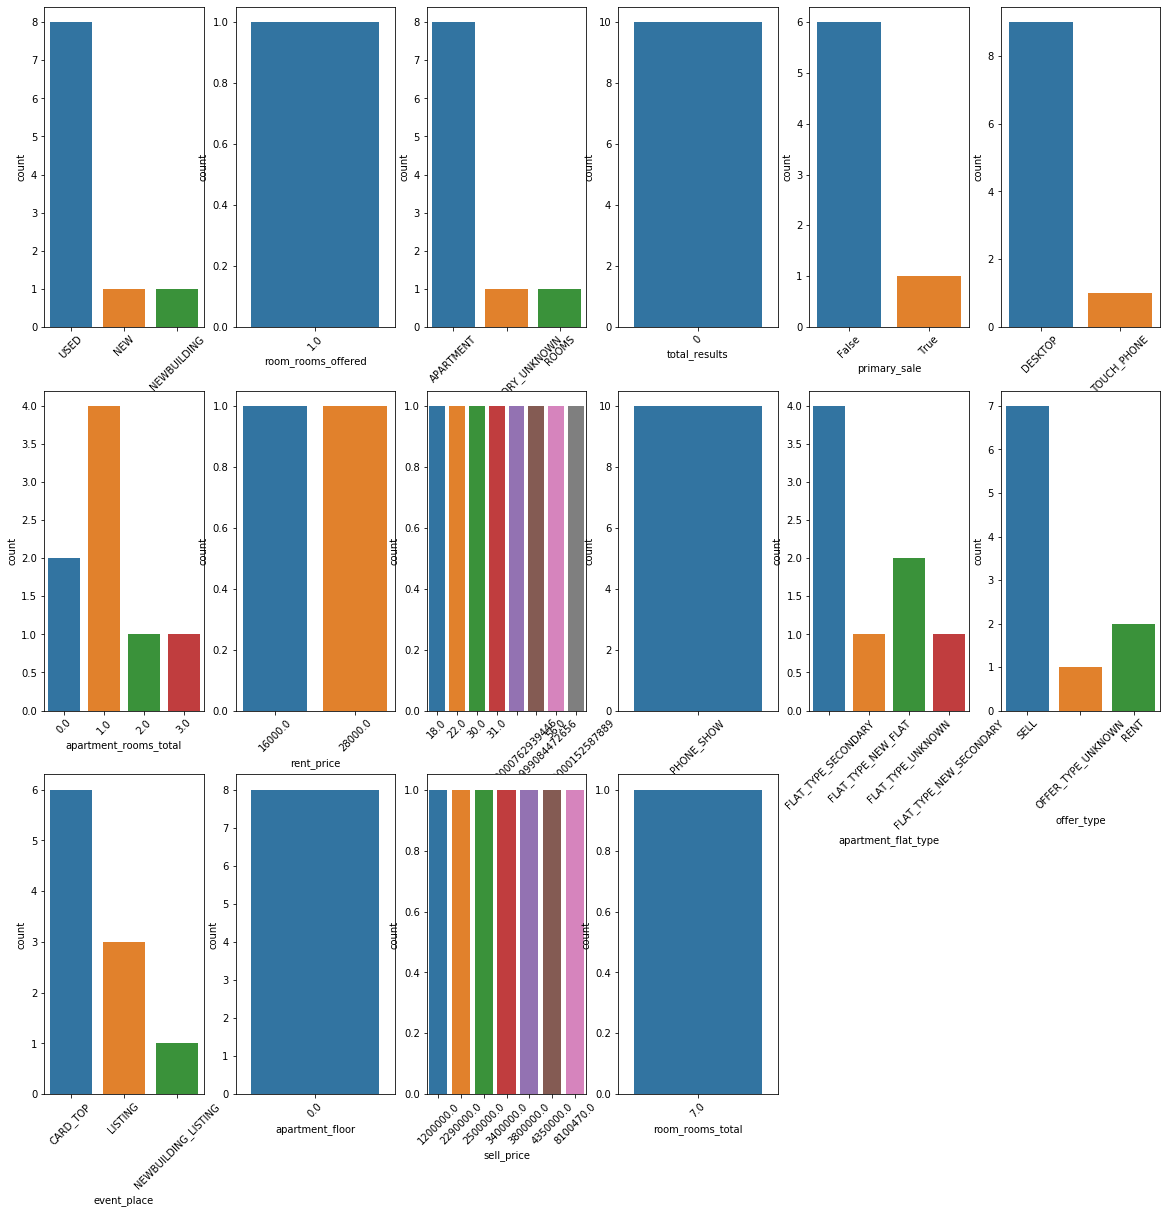

In [158]:
plt.figure(figsize=(20,20))
i=1
for col in phone_call.columns:
    plt.subplot(3,6,i)
    sns.countplot(phone_call[col])
    plt.xticks(rotation=45)
    i=i+1

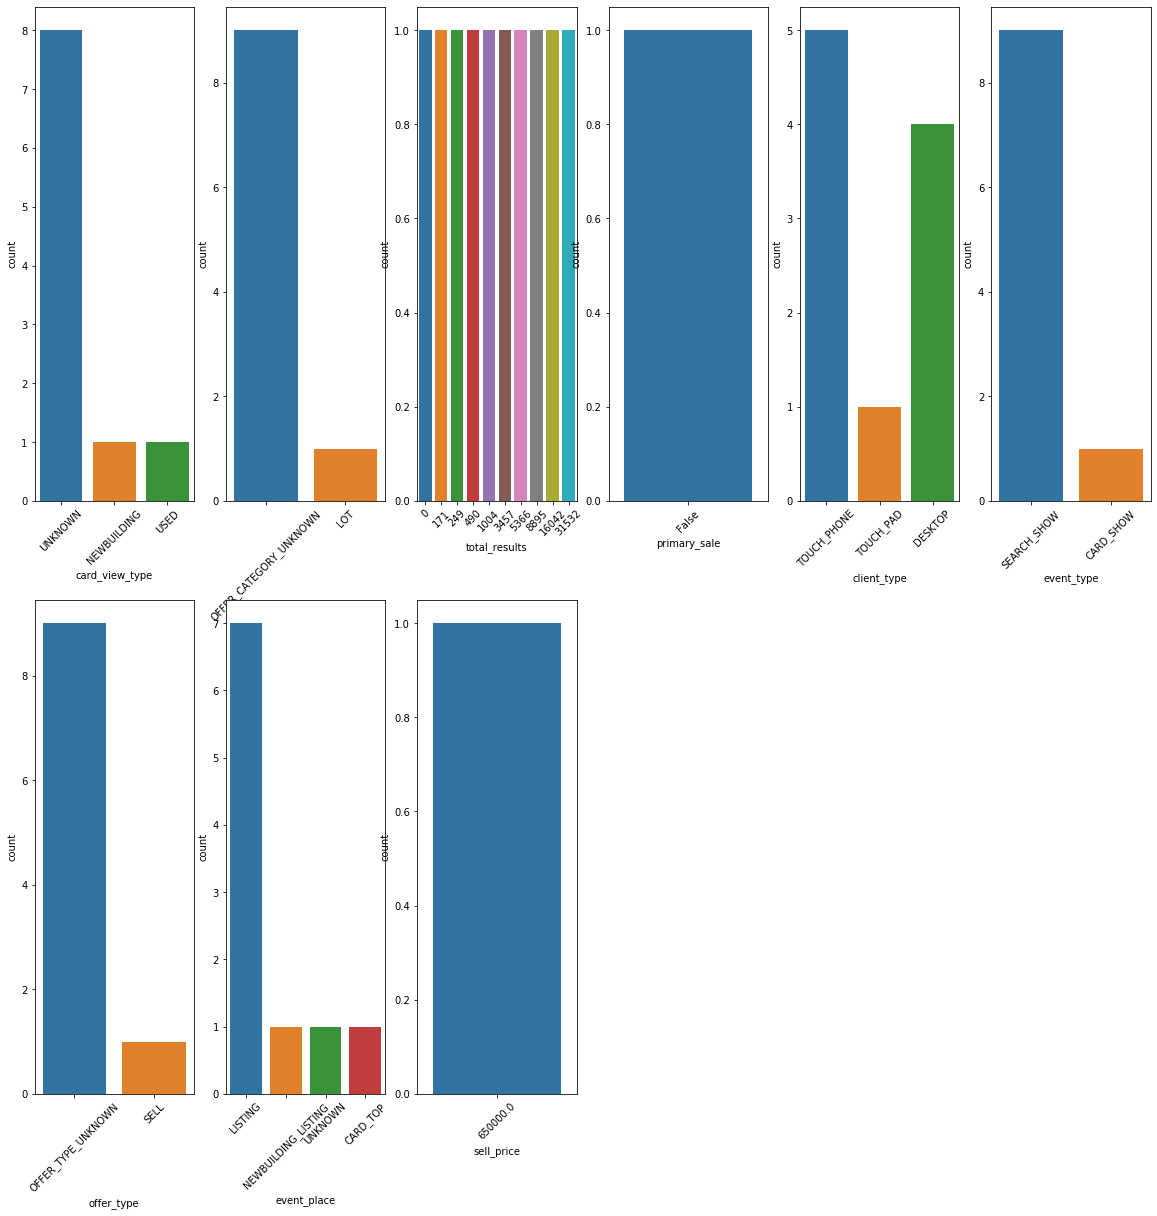

In [160]:
plt.figure(figsize=(20,20))
i=1
for col in not_phone_call.columns:
    plt.subplot(2,6,i)
    sns.countplot(not_phone_call[col])
    plt.xticks(rotation=45)
    i=i+1

Without phone_call event, the results of queries lost more information such as apartmen type,rent price.

In [161]:
intersection = list(set(phone_call.columns).intersection(set(not_phone_call.columns)))

In [173]:
phone_call[intersection]

,event_place,sell_price,offer_category,client_type,primary_sale,event_type,offer_type,card_view_type,total_results
63817,CARD_TOP,3400000.0,APARTMENT,DESKTOP,False,PHONE_SHOW,SELL,USED,0
43972,LISTING,2500000.0,APARTMENT,DESKTOP,False,PHONE_SHOW,SELL,USED,0
45628,CARD_TOP,8100470.0,APARTMENT,DESKTOP,True,PHONE_SHOW,SELL,NEW,0
66249,NEWBUILDING_LISTING,NaN,OFFER_CATEGORY_UNKNOWN,DESKTOP,NaN,PHONE_SHOW,OFFER_TYPE_UNKNOWN,NEWBUILDING,0
40055,CARD_TOP,4350000.0,APARTMENT,DESKTOP,False,PHONE_SHOW,SELL,USED,0
62185,CARD_TOP,1200000.0,ROOMS,DESKTOP,False,PHONE_SHOW,SELL,USED,0
71336,LISTING,NaN,APARTMENT,DESKTOP,NaN,PHONE_SHOW,RENT,USED,0
63665,CARD_TOP,3800000.0,APARTMENT,DESKTOP,False,PHONE_SHOW,SELL,USED,0
20590,LISTING,2290000.0,APARTMENT,TOUCH_PHONE,False,PHONE_SHOW,SELL,USED,0
27032,CARD_TOP,NaN,APARTMENT,DESKTOP,NaN,PHONE_SHOW,RENT,USED,0


In [174]:
not_phone_call[intersection]

,event_place,sell_price,offer_category,client_type,primary_sale,event_type,offer_type,card_view_type,total_results
49953,LISTING,NaN,OFFER_CATEGORY_UNKNOWN,TOUCH_PHONE,NaN,SEARCH_SHOW,OFFER_TYPE_UNKNOWN,UNKNOWN,3457
13215,LISTING,NaN,OFFER_CATEGORY_UNKNOWN,TOUCH_PAD,NaN,SEARCH_SHOW,OFFER_TYPE_UNKNOWN,UNKNOWN,249
13606,LISTING,NaN,OFFER_CATEGORY_UNKNOWN,TOUCH_PHONE,NaN,SEARCH_SHOW,OFFER_TYPE_UNKNOWN,UNKNOWN,16042
6627,NEWBUILDING_LISTING,NaN,OFFER_CATEGORY_UNKNOWN,TOUCH_PHONE,NaN,SEARCH_SHOW,OFFER_TYPE_UNKNOWN,NEWBUILDING,171
64103,LISTING,NaN,OFFER_CATEGORY_UNKNOWN,TOUCH_PHONE,NaN,SEARCH_SHOW,OFFER_TYPE_UNKNOWN,UNKNOWN,8895
24935,UNKNOWN,NaN,OFFER_CATEGORY_UNKNOWN,TOUCH_PHONE,NaN,SEARCH_SHOW,OFFER_TYPE_UNKNOWN,UNKNOWN,5366
46465,LISTING,NaN,OFFER_CATEGORY_UNKNOWN,DESKTOP,NaN,SEARCH_SHOW,OFFER_TYPE_UNKNOWN,UNKNOWN,1004
5873,LISTING,NaN,OFFER_CATEGORY_UNKNOWN,DESKTOP,NaN,SEARCH_SHOW,OFFER_TYPE_UNKNOWN,UNKNOWN,490
33988,LISTING,NaN,OFFER_CATEGORY_UNKNOWN,DESKTOP,NaN,SEARCH_SHOW,OFFER_TYPE_UNKNOWN,UNKNOWN,31532
10136,CARD_TOP,650000.0,LOT,DESKTOP,False,CARD_SHOW,SELL,USED,0


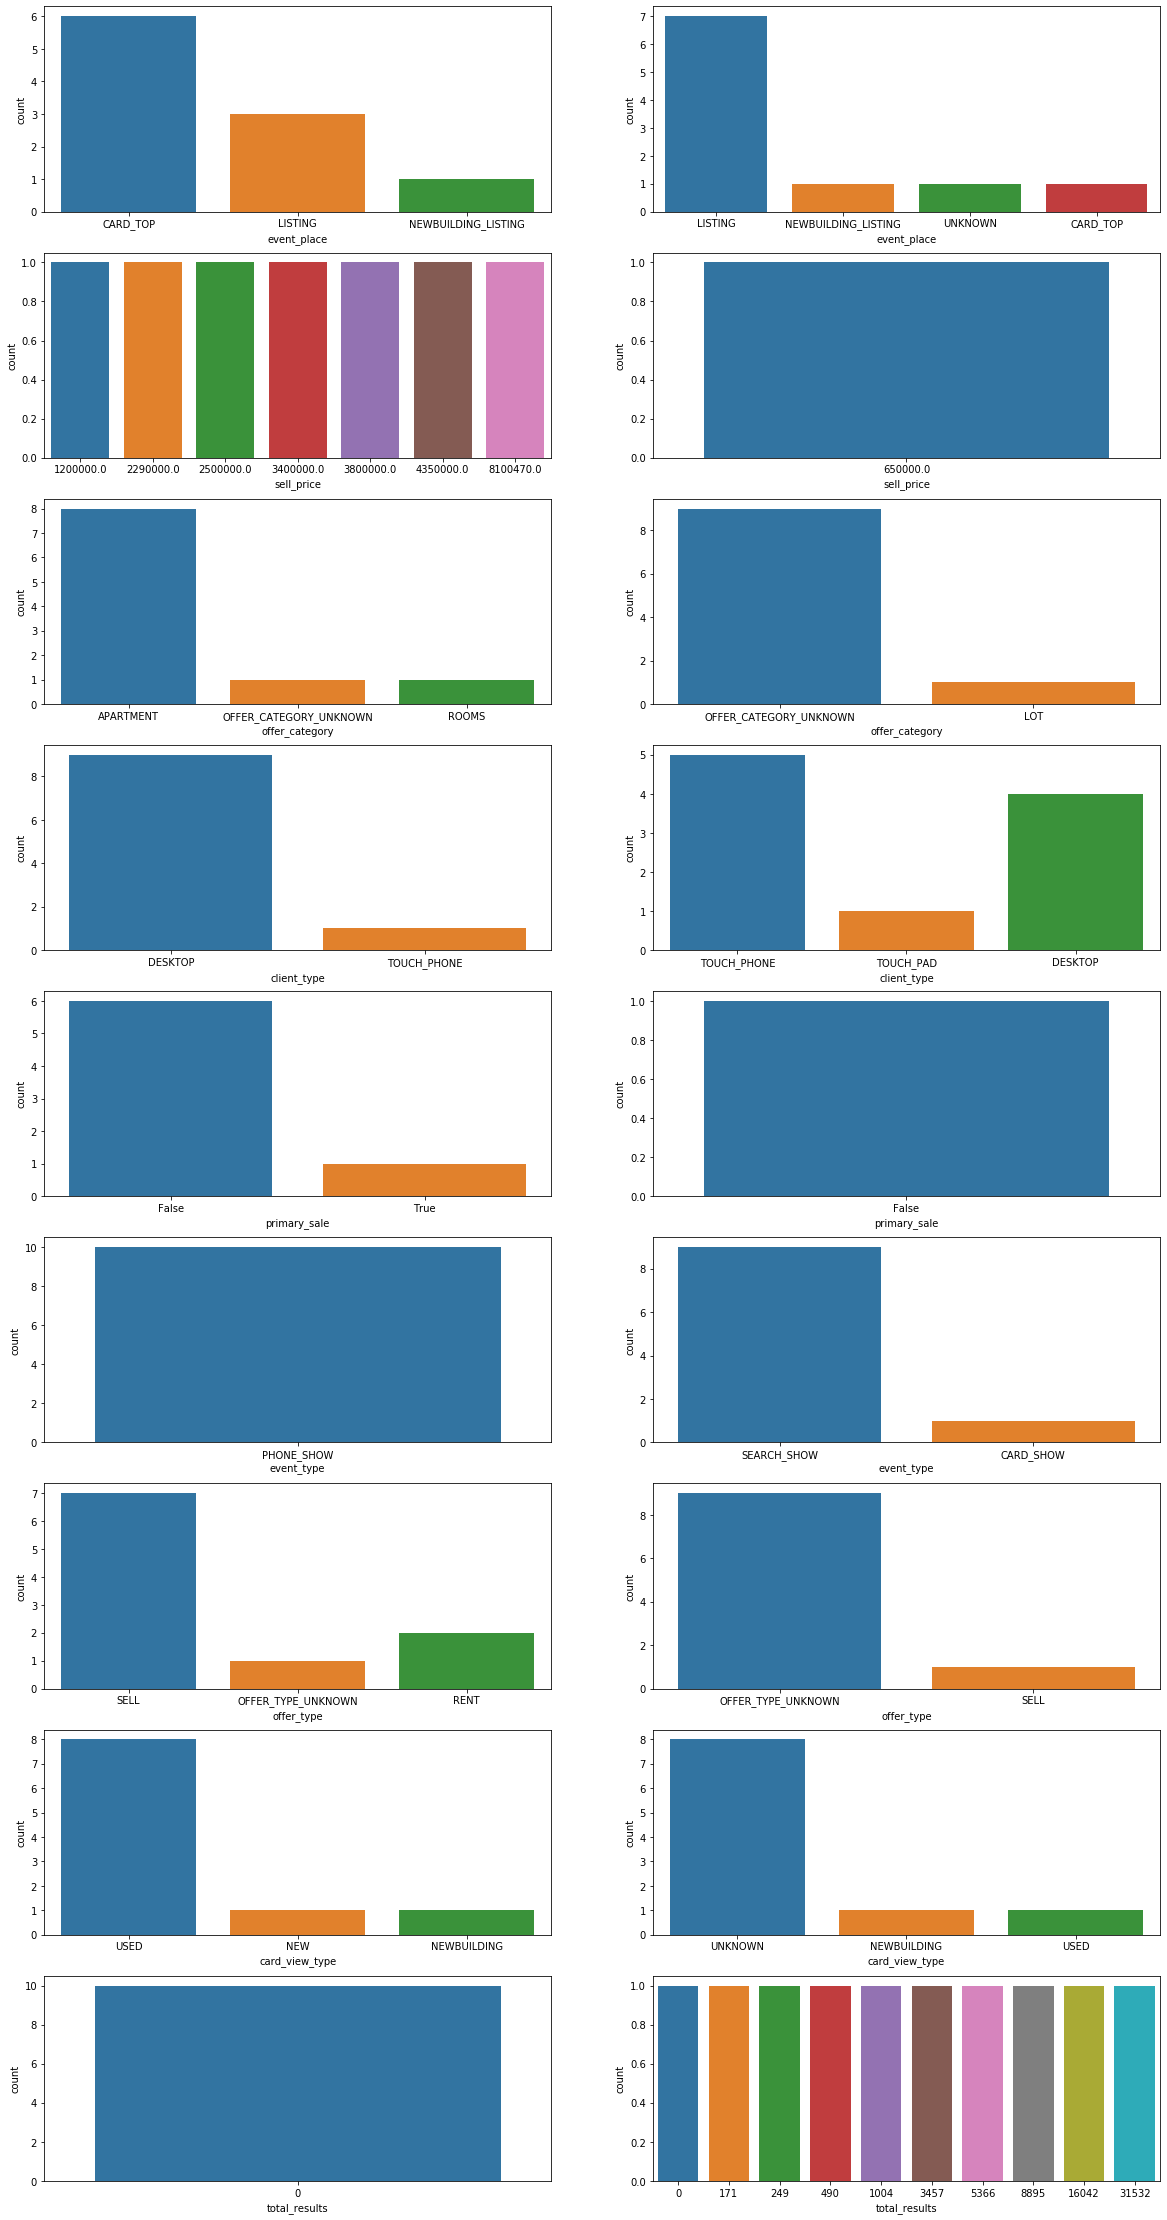

In [176]:
plt.figure(figsize=(20,40))
i=1
for col in intersection:
    plt.subplot(9,2,2*i-1)
    sns.countplot(phone_call[col])

    
    plt.subplot(9,2,2*i)
    sns.countplot(not_phone_call[col])

   # plt.xticks(rotation=45)
    
    i=i+1

### Self-Control Stops

- 2.Compare 10 random sessions with phone call event and without it and share your insights about the difference between users who convert to phone calls and those who don't.


1.users who convert to phone calls get more information such as apartment type,rent price,sell price,total rooms.

2.In event_place, card_top is the most for phone-call users, while for no-phone-call users the most is listing

3.The majority of phone-call users use desktop, while no-phone-call users use touch phone mostly.

4.The card_view_type that phone-call users query mostly is 'used', in terms of no-phone-call users,'used' and 'newbuilding' are equel in quantity.

5.Total_results of  phone-call users are 0, while that of no-phone-call users are different(>=0)


## Self-control stops
### 1. Analyze 10 random users behavior (anonymized_user_id field) and share your insights how product management team could improve Yandex.Realty service.

On the whole, the 10 random USERS lacked serious information.  34.532% of the query information is 0, although  have a lot of query information, they also lack key information such as house type, rent_price, sell_price, and total rooms. In terms of user distribution, Tourch Phone has more users than Destktop. From the event point of view, most log events are search-show instead of card-show.

In summary, the product manager team should enrich the information and reduce the lack of information(espically apartments with 2-3 rooms,rent price about 11544,sell price about 6574043 ); focus on optimizing web search,  the listing and  cart_top.

### 2. Compare 10 random sessions with phone call event and without it and share your insights about the difference between users who convert to phone calls and those who don't.

1.users who convert to phone calls get more information such as apartment type,rent price,sell price,total rooms.

2.In event_place, card_top is the most for phone-call users, while for no-phone-call users the most is listing

3.The majority of phone-call users use desktop, while no-phone-call users use touch phone mostly.

4.The card_view_type that phone-call users query mostly is 'used', in terms of no-phone-call users,'used' and 'newbuilding' are equel in quantity.

5.Total_results of  phone-call users are 0, while that of no-phone-call users are different(>=0)
